In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time

# <p style="color: #6c89c6;">Работу выполнил: Таратин Артём ПМ22-1</p>

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [4]:
X = data.x
y = data.y

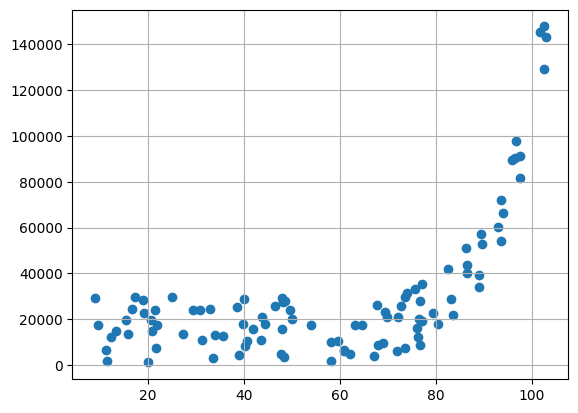

In [5]:
plt.scatter(X, y)
plt.grid(True)
plt.show()

In [6]:
X = pd.DataFrame(X)

In [7]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


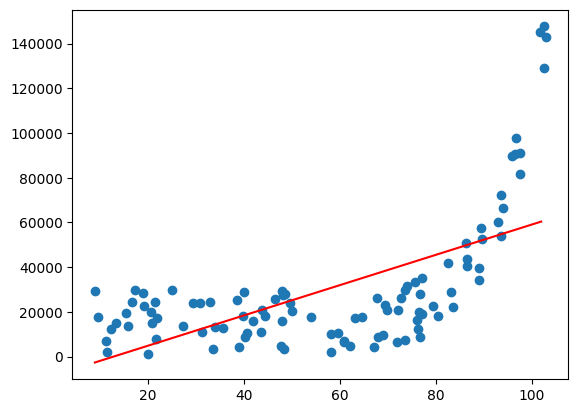

In [8]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [9]:
linear.score(X, y)

0.37467360318911636

In [10]:
from sklearn.preprocessing import PolynomialFeatures
transformation = PolynomialFeatures(degree=2)

In [11]:
transformation.fit(X)
X_2 = transformation.transform(X)
X_2.shape

(100, 3)

In [12]:

X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


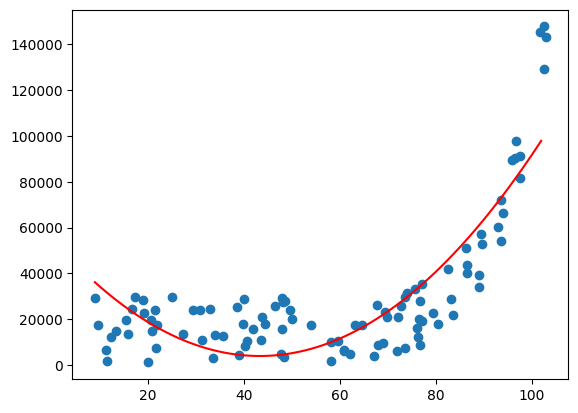

In [13]:
poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [14]:
poly_2d.score(X_2, y)

0.7359753787024842

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)

In [16]:
y = data.y
X = data.drop(["y"], axis=1)

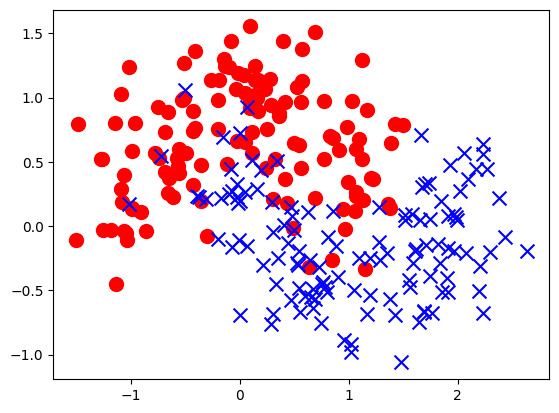

In [17]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic = LogisticRegression().fit(X, y)

/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_90555/739733186.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_90555/739733186.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


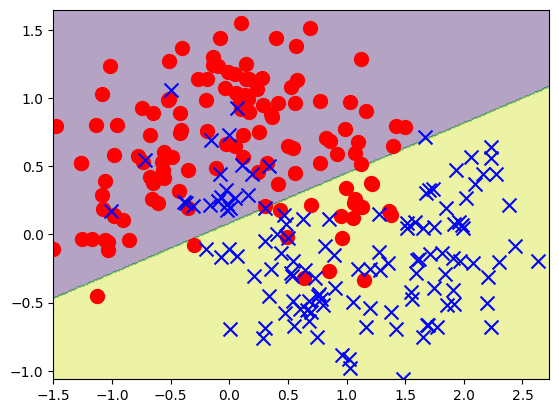

In [20]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [21]:
logistic.score(X, y)

0.832

In [22]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [23]:
X_3.shape

(250, 9)

In [24]:
class_3 = LogisticRegression().fit(X_3, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


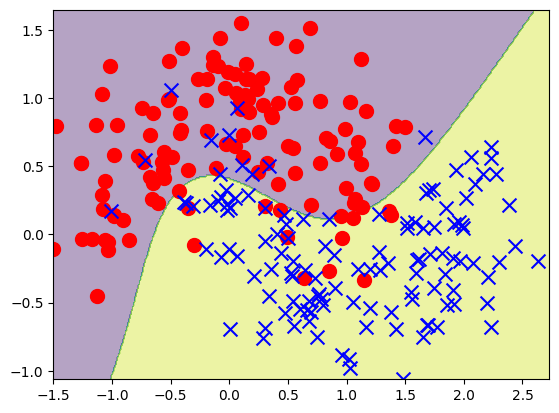

In [25]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [26]:
class_3.score(X_3, y)

0.9

In [27]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [28]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [30]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [31]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109157

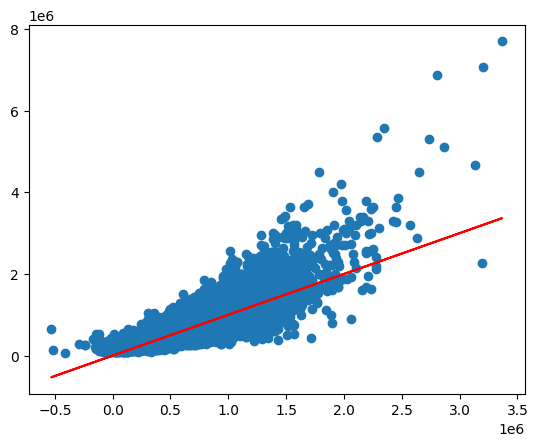

In [32]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [33]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
X_3_kc_prices.shape

(21613, 1330)

In [34]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8649331718705116

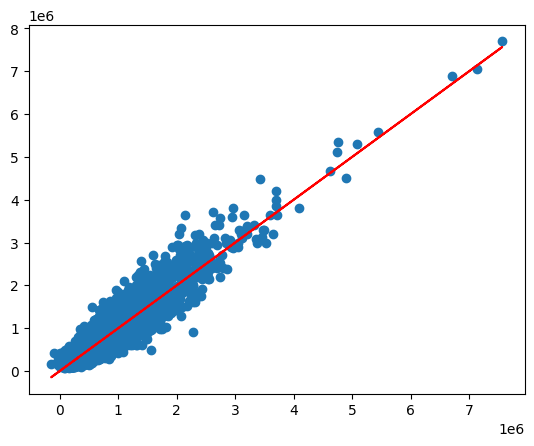

In [35]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

## 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [36]:
%%timeit
LinearRegression().fit(X, y)

278 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.


In [37]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

X = pd.DataFrame(data.x)
y = data.y

In [38]:
def train_poly_model(X, y, degree):
    poly_transform = PolynomialFeatures(degree=degree)
    X_poly = poly_transform.fit_transform(X)
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time
    return model, training_time

for degree in [5, 10, 100]:
    model, training_time = train_poly_model(X, y, degree)
    print(f"Время обучения {degree}-го порядка: {training_time} секунд")

Время обучения 5-го порядка: 0.0005159378051757812 секунд
Время обучения 10-го порядка: 0.0006778240203857422 секунд
Время обучения 100-го порядка: 0.004018068313598633 секунд


## 3. То же самое проделайте с датасетом для классификации и "King county".

In [39]:
for degree in [1, 2, 3, 4]:  # 5, 10, 100
    model, training_time = train_poly_model(X_kc_prices, y_kc_prices, degree)
    print(f"Время обучения {degree}-го порядка: {training_time} секунд")

Время обучения 1-го порядка: 0.008902788162231445 секунд
Время обучения 2-го порядка: 0.12604713439941406 секунд
Время обучения 3-го порядка: 2.169748067855835 секунд
Время обучения 4-го порядка: 102.94296717643738 секунд


Время обучения 1-го порядка: 0.034715890884399414 секунд

Время обучения 2-го порядка: 0.18231201171875 секунд

Время обучения 3-го порядка: 2.852464199066162 секунд

Время обучения 4-го порядка: 124.03843784332275 секунд

## 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [40]:
def test_modeles(X, y):
    start_time = time.time()
    linear_model = LinearRegression().fit(X, y)
    linear_time = time.time() - start_time
    linear_score = linear_model.score(X, y)

    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)

    start_time = time.time()
    poly_model = LinearRegression().fit(X_poly, y)
    poly_time = time.time() - start_time
    poly_score = poly_model.score(X_poly, y)
    
    poly_features = PolynomialFeatures(degree=4)
    X_poly = poly_features.fit_transform(X)

    start_time = time.time()
    poly_model = LinearRegression().fit(X_poly, y)
    poly_time_4 = time.time() - start_time
    poly_score_4 = poly_model.score(X_poly, y)

    results = pd.DataFrame({
        'Модель': ['Linear', 'Polynomial 2nd', 'Polynomial 4th'],
        'Время': [linear_time, poly_time, poly_time_4],
        'R2': [linear_score, poly_score, poly_score_4]
    })

    return results

In [41]:
test_modeles(X, y)

,Модель,Время,R2
0,Linear,0.004275,0.374674
1,Polynomial 2nd,0.000574,0.735975
2,Polynomial 4th,0.001213,0.918601


In [42]:
test_modeles(X_kc_prices, y_kc_prices)

,Модель,Время,R2
0,Linear,0.016520,0.699747
1,Polynomial 2nd,0.238458,0.828826
2,Polynomial 4th,104.099609,0.886309


## 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [43]:
linear_model = LinearRegression().fit(X_kc_prices, y_kc_prices)

In [44]:
coefficients_df = pd.DataFrame({'Attribute': X_kc_prices.columns, 'Coefficient': linear_model.coef_})

coefficients_df

,Attribute,Coefficient
0,bedrooms,-35766.541444
1,bathrooms,41144.278533
2,sqft_living,110.442865
3,sqft_lot,0.128598
4,floors,6689.550115
5,waterfront,582960.458424
6,view,52870.942384
7,condition,26385.649139
8,grade,95890.445152
9,sqft_above,70.785224


## 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [45]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_kc_prices)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_kc_prices)

poly_model.coef_

array([ 9.89241694e+06, -1.00477315e+07,  1.79707545e+04, -2.82569853e+02,
       -4.44089422e+07,  7.20463839e+07,  3.11595776e+06,  9.28948878e+05,
       -1.51010028e+07,  2.32503551e+04, -4.13891014e+04, -4.29206743e+04,
        3.14261196e+04, -5.09242906e+05,  1.01887273e+08,  3.16387071e+06,
       -1.42792479e+04,  4.47644610e+02,  9.14026340e+02,  1.03228335e+03,
       -6.13711990e+01,  6.43460337e-04,  2.32492432e+04, -2.98852654e+04,
        3.42102784e+03, -3.95537506e+03,  1.59364876e+03,  3.43143422e+01,
        4.52443507e+01, -1.93896040e+02, -1.73441459e+01,  9.71028695e+00,
       -2.57441092e+04,  7.56483504e+04,  6.32542921e+00,  1.30434192e-01,
       -4.40002081e+03,  2.12226287e+01, -3.61488173e-01, -3.52568054e+04,
        3.52036453e+04,  4.86627255e+03, -7.38423383e+03,  1.01670592e+04,
        8.33869146e+00,  1.07168282e+01,  3.30637831e+02, -1.80172592e+01,
       -5.98590991e+01,  6.03296885e+04, -1.01230911e+05, -1.26999782e-01,
        2.46281512e-01,  